1. Loading and Preprcessing

In [27]:
# Import required  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [28]:
# Load iris Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preview the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)
species = iris.target

2. Clustering Algorithm Implementation

A. KMeans Clustering

In [ ]:
# KMeans Clustering
# KMeans is an unsupervised clustering algorithm that partitions data into K clusters.Each cluster has a centroid, and data points are assigned to the cluster with the nearest centroid.
# The algorithm iteratively updates centroids and cluster assignments to minimize the sum of squared distances.

# Why KMeans is suitable:
# The Iris dataset has well-separated features and is relatively small, making it ideal for KMeans. We expect 3 clusters (since Iris has 3 species), so K=3 works naturally.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


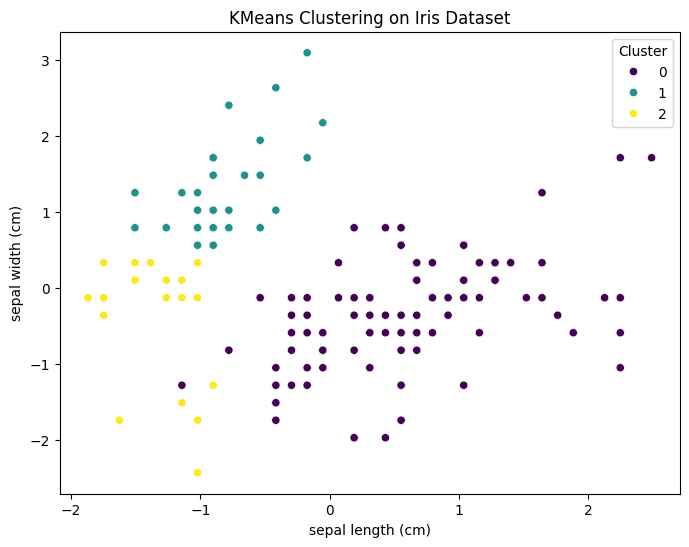

In [ ]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x=iris.feature_names[0], y=iris.feature_names[1], hue='kmeans_cluster', palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.legend(title='Cluster')
plt.show()

   B. Hierarchical Clustering

In [ ]:
# Hierarchical Clustering
# Hierarchical clustering builds a tree-like structure (dendrogram) of nested clusters.Agglomerative (bottom-up) approach starts with each point as its own cluster and merges closest pairs.
# It doesn't require specifying the number of clusters in advance and is good for visualizing structure.

# Why it's suitable
# Hierarchical clustering helps visualize the natural grouping of the data. The dendrogram can help us decide how many clusters to use based on the linkage distance.

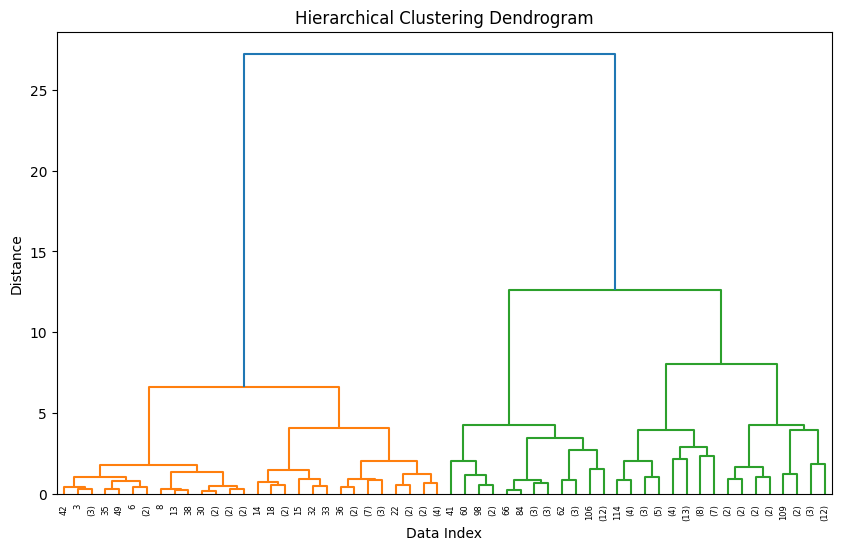

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

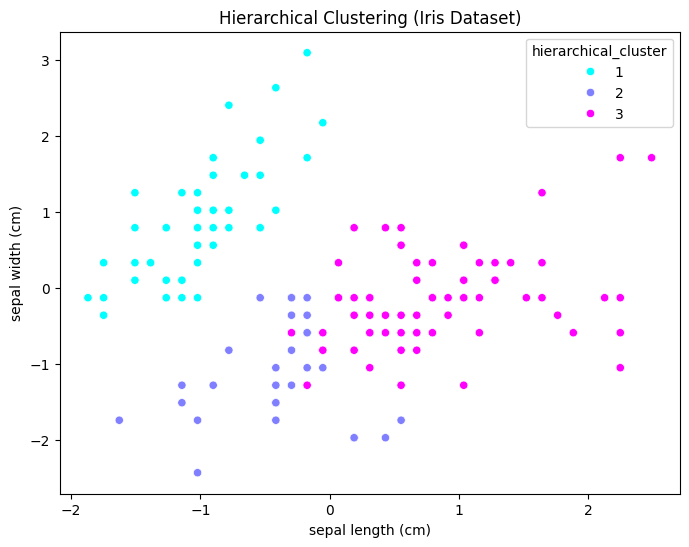

In [ ]:
# Cut denogram at 3 clusters
df_scaled['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualize Hierarchical clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x=iris.feature_names[0], y=iris.feature_names[1],hue='hierarchical_cluster', palette='cool')
plt.title("Hierarchical Clustering (Iris Dataset)")
plt.show()